In [1]:
import numpy as np 
import pandas as pd 
import os
import json


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
################################### Data Processing ###############################################

In [8]:
# Retrieve train & test subsets
df_train = pd.read_csv("data_trials_creaming_train (1).csv")
df_test = pd.read_csv("data_trials_creaming_test.csv")

target = df_train.columns[-1]


# Fit Gradient Boosting model
X_train, y_train = df_train.drop(columns=[target]).values, df_train.loc[:, target].values
X_test, y_test = df_test.drop(columns=[target]).values, df_test.loc[:, target].values

gb = GradientBoostingRegressor(
        n_estimators=300, 
        max_depth=7, 
        random_state=45
        )

gb.fit(X_train, y_train)


# Get Predictions
y_pred = gb.predict(X_test)


# Initialize outputs list for model artifacts
artifacts = []


# Save resulting model
# path_model = os.path.abspath('Gradient_boosting_{}.sav'.format(target.lower()))
# file_id_model = "formulasRDF/processed/lot2/viscosity/model/'Gradient_boosting_{}.sav".format(target.lower())
# joblib.dump(gb, path_model)

# artifacts.append(
#         {
#         "file_path": path_model,
#         "file_id": file_id_model,
#         "bucket_name": data[0]["bucket_name"]
#     }
# )


# Save evaluation metrics json
report_dict = {
    "metrics": {
        "MSE": {
            "value": mean_squared_error(y_test, y_pred),
        },
        
        "MAE": {
            "value": mean_absolute_error(y_test, y_pred),
        },

        "R2 Score": {
            "value": r2_score(y_test, y_pred),
        },
    },
}

# path_evaluation = os.path.abspath('metrics.json')
# file_id_evaluation = "formulasRDF/processed/lot2/viscosity/model/metrics.json"
# with open(path_evaluation, 'w') as f:
#         f.write(json.dumps(report_dict))

# artifacts.append(
#         {
#         "file_path": path_evaluation,
#         "file_id": file_id_evaluation,
#         "bucket_name": data[0]["bucket_name"]
#     }
report_dict

{'metrics': {'MSE': {'value': 197.2936856029584},
  'MAE': {'value': 2.5181999383622724},
  'R2 Score': {'value': -0.09371183087951773}}}

(0.0, 15.0)

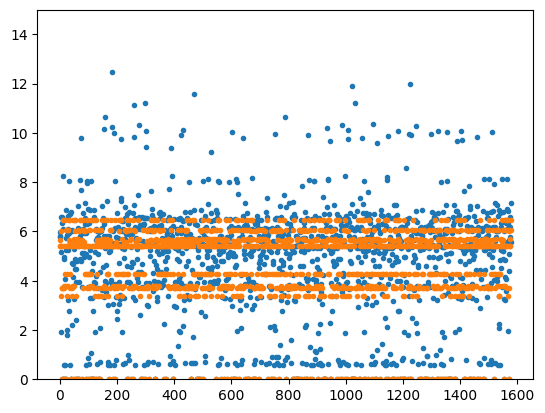

In [14]:
import matplotlib.pyplot as plt 

plt.plot(y_test, '.')
plt.plot(y_pred, '.')
plt.ylim([0,15])

In [17]:
df_train.columns

Index(['%Water', '%Condensat', '%PLE', '%MPC 80', '%Milk Powder',
       '% Rennet casein', '%Acid casein', '%Lactic Acid',
       '%Anhydrci Citric Acid', '%PS 35', '%Maasdam', '%Baby Cheese',
       '%Cheddar Cheese', '(%) Gouda Cheese', '%Cheese Cat 2', '%Cheese Cat 1',
       '%Swiss Cheese', '%Downgraded Pressed Paste Cat 1',
       '%Downgraded Pressed Paste Cat 2', '(%) PP25', '(%)  PP50', '%Butter',
       '%Melting Salt P50', '%Melting Salt K 2285', '%Fine Salt Refined Dry',
       '%DIHYDRATE TRISODIUM CITRATE', '%CALCIUM CONCENTRATE', '%Starch',
       '%RMC 80 HIGH HEAT', '%TEXTURING AGENT FLANOGEN', '%SICAMELT NSQ23',
       '%SICAMELT C23', '%C23 NF', '%CCL', '%CLL.th', 'Vitamine D',
       'Viscosity'],
      dtype='object')

In [3]:
keys_train = [
        'L_train',
        'D7_train',
        'D20_train',
        'a_train',
        'b_train',
]

keys_test = [
    'L_test',
    'D7_test',
    'D20_test',
    'a_test',
    'b_test'
]

dic_train = {}
dic_test = {}

index_train = [0, 2, 4, 6, 8]
index_test = [1, 3, 5, 7, 9]

# Initialize outputs list for model artifacts
artifacts = []

In [4]:
for key_train, idx_train, key_test, idx_test in zip(keys_train, index_train, keys_test, index_test):
    print(key_train, idx_train, key_test, idx_test)

L_train 0 L_test 1
D7_train 2 D7_test 3
D20_train 4 D20_test 5
a_train 6 a_test 7
b_train 8 b_test 9


In [2]:
['formulaUri', 'formulaName'] + ['CPG'] + [0, 2, 5, 8, 9, 9, 6, 2 ,2]

['formulaUri', 'formulaName', 'CPG', 0, 2, 5, 8, 9, 9, 6, 2, 2]